## Programming Assignment 2: Classification Task and Performance Evaluation

In [29]:
import os
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as implt
from PIL import Image
import seaborn as sns
from pathlib import Path
import random
import cv2 as cv

#### 1. Use images from ALL FOUR classes. Convert the images to grayscale pixel intensity histograms.
(These will be the vector representations of the images).

In [2]:
breed_paths =  [
    'Images/n02088632-bluetick/',
    'Images/n02093647-Bedlington_terrier/',
    'Images/n02112137-chow/',
    'Images/n02108089-boxer/'
]
# Check if each folder exists and count image files
images=[]
image_path =[]
labels=[]
for folder_path in breed_paths:
    if os.path.exists(folder_path):
        files = os.listdir(folder_path)
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
                file_path = os.path.join(folder_path, file)
                image_path.append(file_path)
                img=cv.imread(file_path)
                images.append(cv.cvtColor(img,cv.COLOR_BGR2GRAY))
                name = folder_path.split('/')
                labels.append(name[1].split('-')[1])
            
print(f"Names of Breeds: {set(labels)}")

Names of Breeds: {'Bedlington_terrier', 'bluetick', 'boxer', 'chow'}


In [3]:
breed_dict={"File_name":image_path,"Image_array":images,"Breed":labels}
breed_df = pd.DataFrame(breed_dict)
print(breed_df['Breed'].value_counts())

chow                  196
Bedlington_terrier    182
bluetick              171
boxer                 151
Name: Breed, dtype: int64


In [4]:
breed_df.sample(5)

,File_name,Image_array,Breed
168,Images/n02088632-bluetick/n02088632_924.jpg,"[[7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 9,...",bluetick
620,Images/n02108089-boxer/n02108089_2653.jpg,"[[114, 111, 113, 119, 119, 111, 105, 106, 99, ...",boxer
213,Images/n02093647-Bedlington_terrier/n02093647_...,"[[93, 87, 85, 86, 88, 90, 95, 102, 108, 95, 80...",Bedlington_terrier
687,Images/n02108089-boxer/n02108089_836.jpg,"[[100, 101, 102, 100, 98, 96, 97, 98, 108, 108...",boxer
189,Images/n02093647-Bedlington_terrier/n02093647_...,"[[73, 89, 48, 24, 17, 3, 12, 15, 0, 60, 138, 1...",Bedlington_terrier


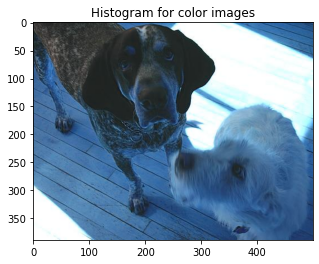

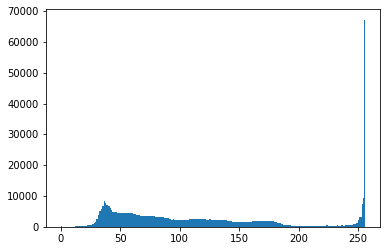

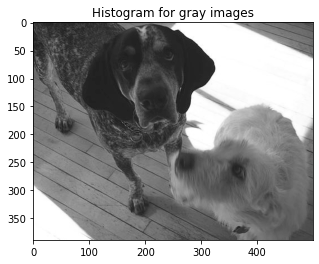

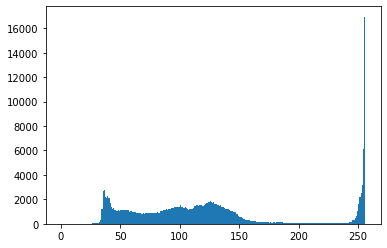

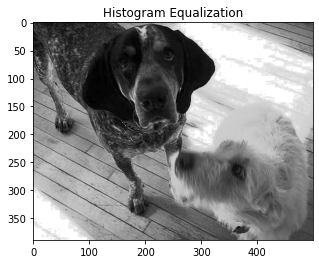

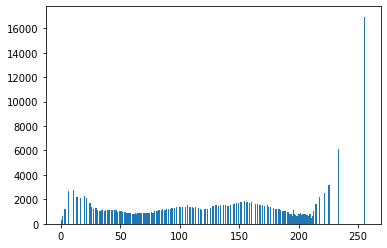

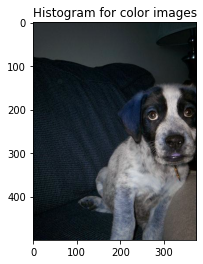

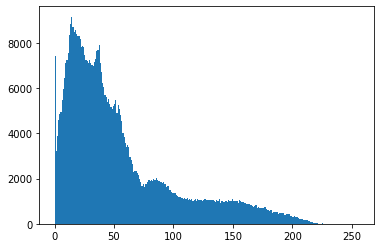

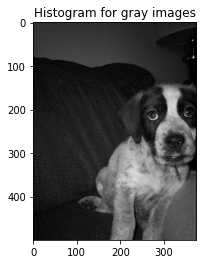

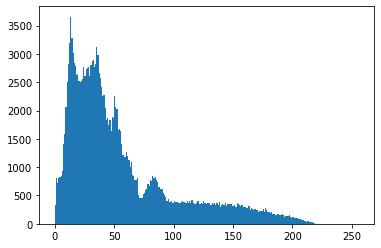

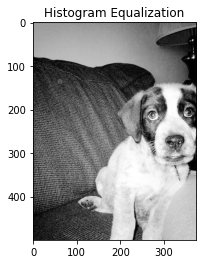

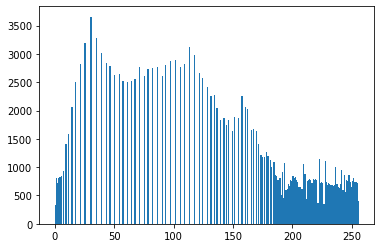

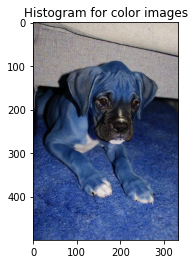

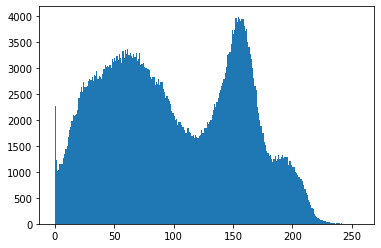

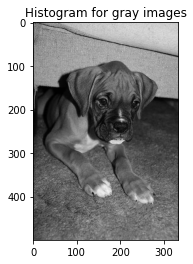

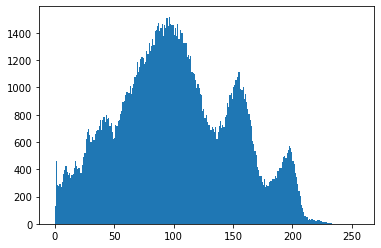

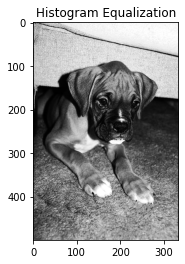

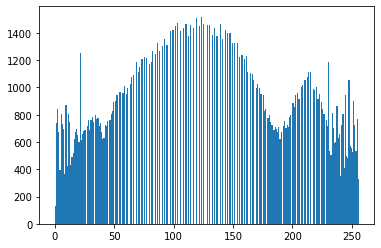

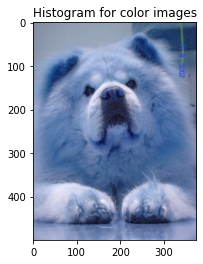

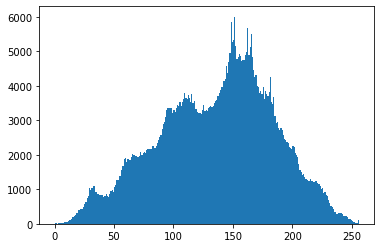

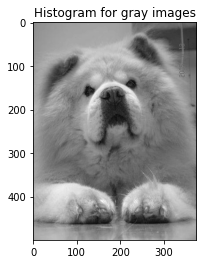

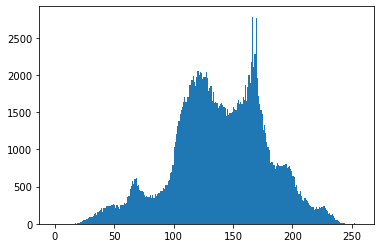

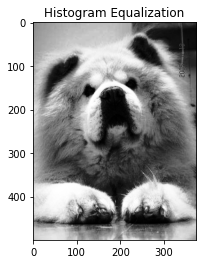

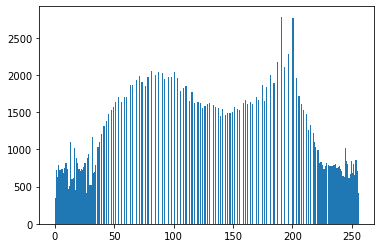

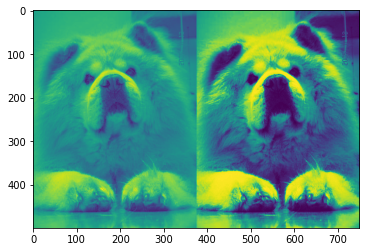

In [30]:
# list for storing different classes of images

random_images = []

#Selecting 4 random images from the 4-classes of breeds
for count in range(4):
    random_images.append(random.choice(image_path))
        
        
for i in random_images:
    img=cv.imread(i)
 
    plt.title("Histogram for color images")
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    plt.imshow(img)
    plt.show()
    plt.hist(img.ravel(),256,[0,256]);
    plt.show()


    plt.title("Histogram for gray images")
    plt.imshow(gray, cmap = 'gray')
    plt.show()
    plt.hist(gray.ravel(),256,[0,256])
    plt.show()


    plt.title("Histogram Equalization")
    equ_gray = cv.equalizeHist(gray)
    plt.imshow(equ_gray, cmap = 'gray')
    plt.show()

    plt.hist(equ_gray.ravel(),256,[0,256])
    plt.show()

    res = np.hstack((gray,equ_gray)) 
    plt.imshow(res)


In [7]:
breed_df["Image_array"][0].shape

(500, 339)

#### 2. Perform standardization on the dataset.

In [8]:
import skimage.transform
resize_image = []
for img in breed_df["Image_array"]:
    resize_image.append(skimage.transform.resize(img, (32, 32)))
img_resize = np.array(resize_image)
df_size = img_resize.shape[0]
image_arr = img_resize.reshape(df_size,-1)

In [9]:
len(image_arr)

700

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

#### 3. Split the dataset into a training set and a test set: For each class, perform a training/test split of 80/20.

In [31]:
breed_df["Labels"] = breed_df["Breed"].map({"chow": 0, "Bedlington_terrier": 1,"bluetick":2,"boxer":3})
breed_labels = ["chow","Bedlington_terrier","bluetick","boxer"]

In [12]:
x = image_arr
y = breed_df['Labels']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101, stratify=y)

print(X_train.shape)
print(X_test.shape)

(560, 1024)
(140, 1024)


#### 4. (Model Selection) Perform a standard 5-fold cross-validation and a stratified 5-fold cross-validation on the training set for k-Nearest Neighbor Classifiers such that 𝑘 = 1, 3, 5, 7, 10, 20. (2.5 points)
• Plot a graph (x-axis: k; y-axis: mean validation/training error (%)) containing four error curves
(2 validation error curves and 2 training error curves - label them clearly using a legend to
define the curves). Which 𝑘 has the lowest mean error for each curve? Comment about (1) the
model complexity for k-Nearest Neighbor classifier in relation to 𝑘, and (2) when/whether there is
overfitting/underfitting. (1.5 points)
• Use the 𝑘 value with the lowest mean validation error for your k-Nearest Neighbor classifier from
the stratified 5-fold cross-validation. What is the test error? (0.25 point)


KNeighborsClassifier scores: [0.35714286 0.38392857 0.29464286 0.40178571 0.40178571]
Average score: 36.79
KNeighborsClassifier scores: [0.32142857 0.35714286 0.32142857 0.33035714 0.375     ]
Average score: 34.11
KNeighborsClassifier scores: [0.42857143 0.33928571 0.28571429 0.375      0.38392857]
Average score: 36.25
KNeighborsClassifier scores: [0.38392857 0.39285714 0.3125     0.33035714 0.44642857]
Average score: 37.32


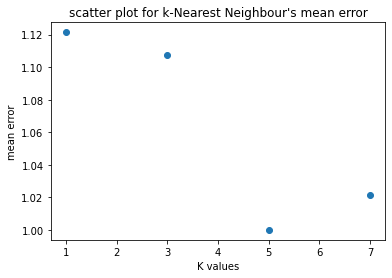

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error
k=[1,3,5,7]
accuracy =[]
mean_error = []
for i in k:
    model = KNeighborsClassifier(n_neighbors=i)
    knn_scores = cross_val_score(model,X_train,y_train,cv=5)
    print(f"KNeighborsClassifier scores: {knn_scores}")
    accuracy.append(knn_scores.mean())
    print(f"Average score: {knn_scores.mean()*100:0.2f}")
    model.fit(X_train, y_train)
    #Predicting y for X_test
    y_pred = model.predict(X_test)
    mean_error.append(mean_absolute_error(y_pred, y_test))
    
plt.scatter(k,mean_error)
plt.title("scatter plot for k-Nearest Neighbour's mean error")
plt.xlabel("K values")
plt.ylabel("mean error")
plt.show()

##### The mean error of K=5 is less compare to other values

Accuracy: 36.43%
              precision    recall  f1-score   support

           0       0.37      0.56      0.45        39
           1       0.46      0.43      0.44        37
           2       0.25      0.15      0.19        34
           3       0.31      0.27      0.29        30

    accuracy                           0.36       140
   macro avg       0.35      0.35      0.34       140
weighted avg       0.35      0.36      0.35       140



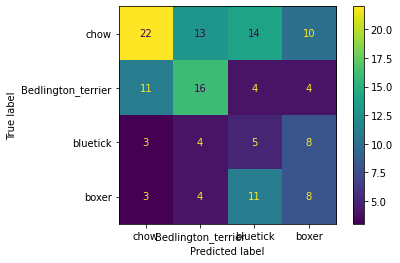

In [33]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
#Predicting y for X_test
y_pred = knn_model.predict(X_test)

acc = knn_model.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(acc * 100))
print(classification_report(y_test, y_pred))

#Comparing the predictions against the actual observations in y_test
cm = confusion_matrix(y_pred, y_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = breed_labels)
cm_display.plot()
plt.show()

### 5. (Performance Comparison) Perform stratified 5-fold cross-validation on the 4-class classification problem
using the three classification methods (available on canvas) assigned to you. Plot the confusion matrices
for the three approaches (clearly label the classes) using the test set (See Figure 1). 

#### GaussianNB Classifier

In [15]:
from sklearn.naive_bayes import GaussianNB 
gnb_model = GaussianNB()
gnb_scores = cross_val_score(gnb_model,X_train, y_train, cv=5)
print(f"GaussianNB Classifier scores: {gnb_scores}")
print(f"Average score = {gnb_scores.mean()*100:0.2f}")

GaussianNB Classifier scores: [0.33035714 0.44642857 0.41071429 0.39285714 0.41071429]
Average score = 39.82


Accuracy: 42.14%
              precision    recall  f1-score   support

           0       0.38      0.41      0.40        39
           1       0.52      0.59      0.56        37
           2       0.43      0.29      0.35        34
           3       0.33      0.37      0.35        30

    accuracy                           0.42       140
   macro avg       0.42      0.42      0.41       140
weighted avg       0.42      0.42      0.42       140



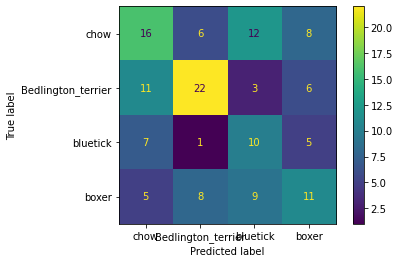

In [34]:
gnb_model.fit(X_train, y_train)
acc = gnb_model.score(X_test, y_test)

#Predicting y for X_test
y_pred = gnb_model.predict(X_test)

acc = gnb_model.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(acc * 100))
print(classification_report(y_test, y_pred))

#Comparing the predictions against the actual observations in y_test
cm = confusion_matrix(y_pred, y_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = breed_labels)
cm_display.plot()
plt.show()

#### SVM

In [17]:
from sklearn.svm import SVC
svm_model = SVC(kernel = 'linear')
svm_scores = cross_val_score(svm_model,X_train, y_train, cv=5)
print(f"SVM Classifier scores: {svm_scores}")
print(f"Average score = {svm_scores.mean()*100:0.2f}")

SVM Classifier scores: [0.25       0.27678571 0.33035714 0.38392857 0.38392857]
Average score = 32.50


Accuracy: 35.71%
              precision    recall  f1-score   support

           0       0.33      0.38      0.36        39
           1       0.46      0.49      0.47        37
           2       0.38      0.32      0.35        34
           3       0.22      0.20      0.21        30

    accuracy                           0.36       140
   macro avg       0.35      0.35      0.35       140
weighted avg       0.35      0.36      0.35       140



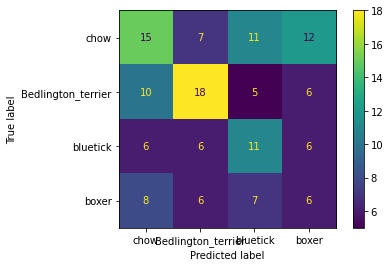

In [35]:
svm_model.fit(X_train, y_train)
acc = svm_model.score(X_test, y_test)

#Predicting y for X_test
y_pred = svm_model.predict(X_test)

acc = svm_model.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(acc * 100))
print(classification_report(y_test, y_pred))

#Comparing the predictions against the actual observations in y_test
cm = confusion_matrix(y_pred, y_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = breed_labels)
cm_display.plot()
plt.show()

####  Ada Boost

In [19]:
from sklearn.ensemble import AdaBoostClassifier
ABC_model = AdaBoostClassifier()
abc_scores = cross_val_score(ABC_model,X_train, y_train,cv=5)
print(f"AdaBoostClassifier scores: {abc_scores}")
print(f"Average score = {abc_scores.mean()*100:0.2f}")

AdaBoostClassifier scores: [0.33035714 0.33928571 0.34821429 0.35714286 0.39285714]
Average score = 35.36


Accuracy: 34.29%
              precision    recall  f1-score   support

           0       0.35      0.44      0.39        39
           1       0.45      0.46      0.45        37
           2       0.25      0.24      0.24        34
           3       0.29      0.20      0.24        30

    accuracy                           0.34       140
   macro avg       0.33      0.33      0.33       140
weighted avg       0.34      0.34      0.34       140



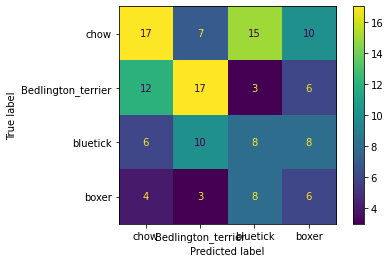

In [37]:
#Fitting the training data to the network
ABC_model.fit(X_train, y_train)

#Predicting y for X_test
y_pred = ABC_model.predict(X_test)

acc = ABC_model.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(acc * 100))
print(classification_report(y_test, y_pred))

#Comparing the predictions against the actual observations in y_test
cm = confusion_matrix(y_pred, y_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = breed_labels)
cm_display.plot()
plt.show()

#### MLPClassifier

In [21]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier
mlp_model = MLPClassifier(ℎ𝑖𝑑𝑑𝑒𝑛_𝑙𝑎𝑦𝑒𝑟_𝑠𝑖𝑧𝑒𝑠 = (10, 10, 10, ) )
mlp_scores = cross_val_score(mlp_model,X_train, y_train, cv=5)
print(f"MLP Classifier scores: {mlp_scores}")
print(f"Average score = {mlp_scores.mean()*100:0.2f}")

C:\Users\Sahasra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sahasra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sahasra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sahasra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Classifier scores: [0.34821429 0.33035714 0.32142857 0.45535714 0.41071429]
Average score = 37.32


C:\Users\Sahasra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 37.14%
              precision    recall  f1-score   support

           0       0.36      0.33      0.35        39
           1       0.53      0.57      0.55        37
           2       0.29      0.32      0.31        34
           3       0.27      0.23      0.25        30

    accuracy                           0.37       140
   macro avg       0.36      0.36      0.36       140
weighted avg       0.37      0.37      0.37       140



C:\Users\Sahasra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


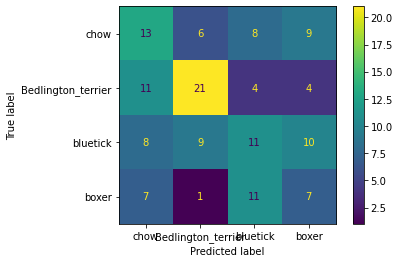

In [39]:
#Fitting the training data to the network
mlp_model.fit(X_train, y_train)

#Predicting y for X_test
y_pred = mlp_model.predict(X_test)

acc = mlp_model.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(acc * 100))
print(classification_report(y_test, y_pred))

#Comparing the predictions against the actual observations in y_test
cm = confusion_matrix(y_pred, y_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = breed_labels )
cm_display.plot()
plt.show()

#### Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
DTC_model=DecisionTreeClassifier(max_depth=10)
dtc_scores = cross_val_score(DTC_model,X_train, y_train,cv=5)
print(f"Decision tree Classifier scores: {dtc_scores}")
print(f"Average score = {dtc_scores.mean()*100:0.2f}")

Decision tree Classifier scores: [0.3125     0.38392857 0.3125     0.32142857 0.29464286]
Average score = 32.50


Accuracy: 40.71%
              precision    recall  f1-score   support

           0       0.32      0.26      0.29        39
           1       0.47      0.43      0.45        37
           2       0.48      0.62      0.54        34
           3       0.32      0.33      0.33        30

    accuracy                           0.41       140
   macro avg       0.40      0.41      0.40       140
weighted avg       0.40      0.41      0.40       140



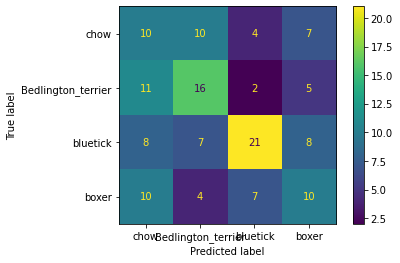

In [40]:
#Fitting the training data to the network
DTC_model.fit(X_train, y_train)

#Predicting y for X_test
y_pred = DTC_model.predict(X_test)

acc = DTC_model.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(acc * 100))
print(classification_report(y_test, y_pred))

#Comparing the predictions against the actual observations in y_test
cm = confusion_matrix(y_pred, y_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = breed_labels)
cm_display.plot()
plt.show()

#### Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
RFC_model=RandomForestClassifier()
rfc_scores = cross_val_score(RFC_model,X_train, y_train,cv=5)
print(f"Random Forest Classifier scores: {rfc_scores}")
print(f"Average score = {rfc_scores.mean()*100:0.2f}")

Random Forest Classifier scores: [0.3125     0.47321429 0.44642857 0.39285714 0.40178571]
Average score = 40.54


Accuracy: 44.29%
              precision    recall  f1-score   support

           0       0.38      0.38      0.38        39
           1       0.50      0.65      0.56        37
           2       0.50      0.56      0.53        34
           3       0.29      0.13      0.18        30

    accuracy                           0.44       140
   macro avg       0.42      0.43      0.41       140
weighted avg       0.42      0.44      0.42       140



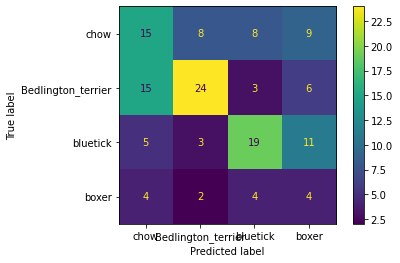

In [41]:
#Fitting the training data to the network
RFC_model.fit(X_train, y_train)

#Predicting y for X_test
y_pred = RFC_model.predict(X_test)

acc = RFC_model.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(acc * 100))
print(classification_report(y_test, y_pred))

#Comparing the predictions against the actual observations in y_test
cm = confusion_matrix(y_pred, y_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = breed_labels)
cm_display.plot()
plt.show()

#### • Based on the confusion matrices (on the test set), which do you think is the best method? Why? (1
#### point)<br>

Basing on the confusion matrices the accuracy scores are as follows:

MLP classifier = 52/140 = 37.1%
GNB classifier = 59/140 = 42.1%
Adaboost classifier = 48/140 = 34.2%


From the above, it could be said that Naive Baye's Classifier is the best method.


#### • Based on the validation accuracies (from the 5-fold cross-validation) for the three methods. Which
#### is the best method? (0.5 point)<br>

Basing on the Validation accuracies (from the 5 fold cross cross validation), the accuracy scores are as follows:

MLP classifier = 37.32%
GNB classifier = 39.82%
Adaboost classifier = 35.36%

From the above, it could be said that Naive Baye's Classifier is the best method.


#### • Computer the test accuracies for the three methods. Which is the best method? (0.5 point)<br>

Basing on the test accuracies, the accuracy scores are as follows:

MLP classifier = 37.14%
GNB classifier = 42.14%
Adaboost classifier = 34.29%

From the above, it could be said that Naive Baye's Classifier is the best method.


#### • Compute the F-measure for the three methods on the test set. Which is the best method? (1 point)

F-Measure = (2*Precision*Recall) / (Precision + Recall)
Basing on the F-Measures, the accuracy scores are as follows:

MLP classifier = 0.36
GNB classifier = 0.42
Adaboost classifier = 0.33

From the above, it could be said that Naive Baye's Classifier is the best method.



In [28]:
# reference:
# https://www.geeksforgeeks.org/image-resizing-using-opencv-python
# https://www.geeksforgeeks.org/python-grayscaling-of-images-using-opencv
# https://www.tutorialspoint.com/how-to-normalize-an-image-in-opencv-python
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
# https://medium.com/@svanillasun/how-to-deal-with-cross-validation-based-on-knn-algorithm-compute-auc-based-on-naive-bayes-ff4b8284cff4
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html